In [2]:
import sys
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

In [3]:
# 드라이버 옵션 설정
chrom_options = webdriver.ChromeOptions()
chrom_options.add_experimental_option('detach', True)
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrom_options)

In [4]:
# 브라우저 띄우기
driver.get('https://www.instagram.com/')
driver.implicitly_wait(2)

In [5]:
# 로그인 설정
login_id = 'sumaoo20@naver.com'
login_pw = '###'

In [6]:
# 로그인
# driver.find_element(By.XPATH, '//*[@id="loginForm"]/div/div[1]/div/label/input').send_keys(login_id)
# driver.find_element(By.XPATH, '//*[@id="loginForm"]/div/div[2]/div/label/input').send_keys(login_pw)
# time.sleep(2)

## 로그인 다른 방법
driver.find_elements(By.CSS_SELECTOR, "._aa4b._add6._ac4d")[0].send_keys(login_id)
driver.find_elements(By.CSS_SELECTOR, "._aa4b._add6._ac4d")[1].send_keys(login_pw)


In [7]:
# driver.find_element(By.XPATH, '//*[@id="loginForm"]/div/div[3]').click()
driver.find_element(By.CSS_SELECTOR, '._acan._acap._acas._aj1-').click()

driver.implicitly_wait(3)
time.sleep(3)

In [8]:
# 검색 설정 및 검색
keyword = '테이퍼드핏'
driver.get(f'https://www.instagram.com/explore/tags/{keyword}/')
driver.implicitly_wait(5)
time.sleep(5)

In [24]:
a = driver.find_elements(By.CSS_SELECTOR, 'div._aagw')
a[0].click()
time.sleep(2)
# 포스트 정보 가져오기

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
time.sleep(2)
print('포스트 정보 가져오기 완료')

# id 정보 얻기
id = soup.select('div')[1]['id']
print(id)

# xpath 변환 함수 설정
def XPATH_id_changer(id, s):
    # s 는 바꿀 주소, id 는 id 정보
    locate = s.find('id=') + 4
    return s[:locate] + id + s[locate + len(id):]

# 댓글 수집 함수
def comment_scraping():
    # 댓글 요소 검색
    ul_list = soup.find_all('ul', class_='_a9ym')

    comments_list = []
    for i in ul_list:
        temp_list = i.find_all('div', class_='_a9zs')  # find_all로 변경
        for temp in temp_list:
            text = temp.find('span')
            if text:
                try:
                    text.find('a').decompose()
                except:
                    pass
                comment_text = text.get_text().strip()
                if 'https://' not in comment_text:
                    comments_list.append(comment_text)
    return comments_list
import re
hashtag_regex = "#([0-9a-zA-Z가-힣]*)"

# 해시태그 수집 함수 설정
def hashtag_scraping():
    ul_list = soup.find_all('div', class_='_a9zr')
    
    hashtag_list = []
    for i in ul_list:
        hashtags = i.find('div', class_='_a9zs')
        if hashtags:
            a_atags = hashtags.find_all('a', class_='x1i10hfl')
            for a_tag in a_atags:
                hashtag_text = a_tag.get_text()
                match = re.match(hashtag_regex, hashtag_text)
                if match:
                    extracted_hashtag = match.group(1)
                    if any(char.isalpha() for char in extracted_hashtag):
                        hashtag_list.append(extracted_hashtag)
    return hashtag_list

all_hashtags = []
all_comments = []

post_count = 100
for i in range(post_count - 1):
    try:
        if i == 0:
            driver.find_element(By.XPATH, XPATH_id_changer(id, '//*[@id="mount_0_0_om"]/div/div/div[3]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div/button')).click()
        else:
            driver.find_element(By.XPATH, XPATH_id_changer(id, '//*[@id="mount_0_0_om"]/div/div/div[3]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div[2]/button')).click()
    except:
        break
    time.sleep(1)
    # 현재 페이지 정보 수집
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    # 해쉬태그 스크래핑
    hashtags = hashtag_scraping()
    all_hashtags.extend(hashtags)
    comments = comment_scraping()
    all_comments.extend(comments)

print('Total hashtag count:', len(all_hashtags))
print("All hashtags:", all_hashtags)
print("comments:", all_comments)

포스트 정보 가져오기 완료
mount_0_0_Ve
Total hashtag count: 1075
All hashtags: ['데님팬츠', 'DENIM', '데님진', '블랙진', '와이드핏', '레귤러핏', '슬림핏', '스트레이트핏', '테이퍼드핏', '무신사', '무신사매거진', 'MUSINSA', '레스', 'RES', '레스', '레스옴므', '테이퍼드핏', '청바지코디', '빅사이즈청바지', '데일리코디', '가을코디', '남친코디', '남자옷코디', '자체제작', '수입의류', '남자옷', 'minimalfit', 'minimalfashion', '데일리룩', '남자데일리룩', '남자코디', '남자봄코디', '남자자켓', '왁스자켓', '레더자켓', '테이퍼드핏', '미니멀룩', '신규업체', '사장님들', '당당하게', '샘플요청주세요', '시리즈', '테이퍼드핏', '5컬러데님', '데일리룩', '치노팬츠', '테이퍼드핏', '면바지', '아메카지', '워크웨어', '광명동굴', '와인동굴', '동굴', 'cave', 'ootd', '오오티디', '여름코디', '여자코디', '여자패션', '10대코디', '20대코디', '대학생코디', '코디추천', '오늘의코디', '크롭티코디', '크롭티셔츠', '데일리룩', '캐주얼룩', '긴자팬츠', '테이퍼드핏', '배기핏', '팬츠코디', '바지추천', '슈탠다드스니커즈', '신발추천', '좋반', '좋아요반사', '협찬디엠', '패션계정맞팔', '패션계정소통', '리치클래드', 'richclad', 'oldmoney', '올드머니룩', '남자슬랙스', '남자패션코디', '테이퍼드핏', '테이퍼드팬츠', '리치클래드', 'richclad', 'oldmoney', '올드머니룩', 'luxuryfashion', 'ootd', '테이퍼드핏', '남자팬츠', '남자패션코디', '리치클래드', 'richclad', 'oldmoney', '올드머니룩', '남자클래식', '남자팬츠', '남자패션', '트라우저', '

In [10]:
import csv

csv_file_name = f"{keyword}.csv"

with open(csv_file_name, 'w', newline='', encoding='utf-8-sig') as csvfile:
    csvwriter = csv.writer(csvfile)
    
    # 헤더 작성
    csvwriter.writerow(['hashtag'])
    
    for hashtag in all_hashtags:
        csvwriter.writerow([hashtag])
        
print(f"Total {len(all_hashtags)} hashtags have been written to {csv_file_name}")

Total 1154 hashtags have been written to 레귤러핏.csv


In [25]:
# comments csv
import csv
csv_file_name = f"{keyword}comments.csv"

with open(csv_file_name, 'w', newline='', encoding='utf-8-sig') as csvfile:
    csvwriter = csv.writer(csvfile)
    
    # 헤더 작성
    csvwriter.writerow(['comments'])
    
    for comments in all_comments:
        csvwriter.writerow([comments])
print(f"Total {len(all_comments)} hashtags have been written to {csv_file_name}")

Total 469 hashtags have been written to 테이퍼드핏comments.csv


In [26]:
import pandas as pd

# 합칠 CSV 파일들의 리스트 생성
csv_files = ["레귤러핏comments.csv", "세미오버핏comments.csv", "슬림핏comments.csv", "오버핏comments.csv", "와이드핏comments.csv", "테이퍼드핏comments.csv",]

# CSV 파일들을 DataFrame으로 읽기
dataframes = [pd.read_csv(csv_file) for csv_file in csv_files]

# DataFrame들을 하나로 합치기
merged_dataframe = pd.concat(dataframes, ignore_index=True)

# 새로운 CSV 파일로 저장
merged_csv_filename = "comments-merged.csv"

merged_dataframe.to_csv(merged_csv_filename, index=False, encoding='utf-8-sig')

print(f"Merged CSV file has been created: {merged_csv_filename}")

Merged CSV file has been created: comments-merged.csv


In [16]:
# 폰트 경로 확인
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()
[f for f in sys_font if 'Nanum' in f]

[]

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd


# CSV 파일 읽기
csv_filename = "musinsa.csv"
data = pd.read_csv(csv_filename)

# mask
mask_path = "heart.png"
mask = np.array(Image.open(mask_path))

# 모든 텍스트 합치기
all_text = ' '.join(data['기본티'])



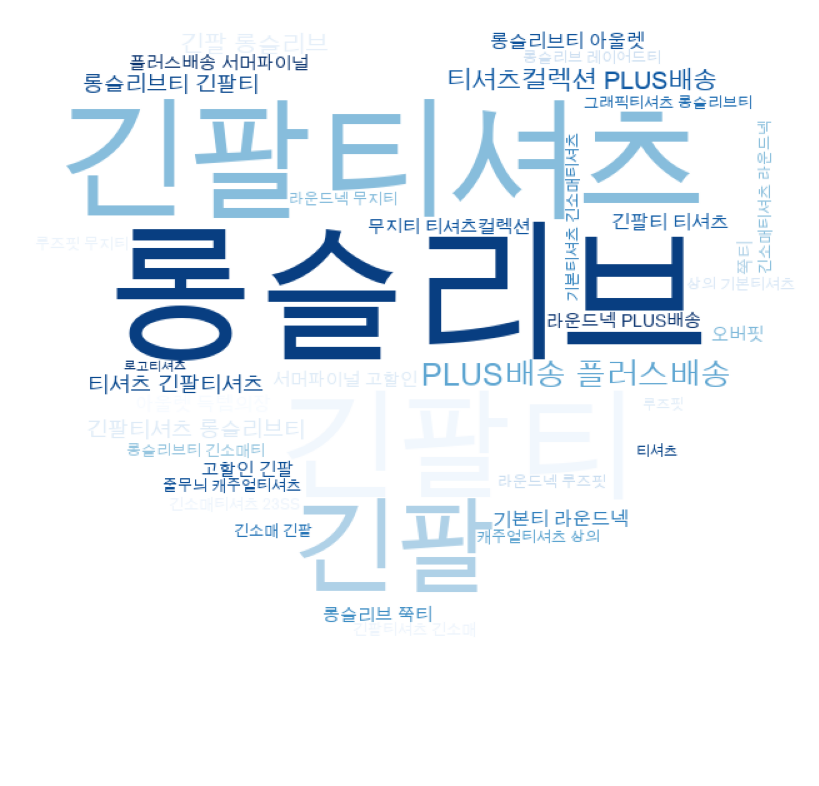

In [4]:

font_path = "/Library/Fonts/Arial Unicode.ttf"

# 워드 클라우드 생성
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      font_path=font_path,
                      colormap='Blues',
                      mask= mask,
                      min_font_size=10).generate(all_text)

# 워드 클라우드 시각화
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# 워드 클라우드 저장 (선택사항)
output_filename = "wordcloud.png"
plt.savefig(output_filename)

plt.show()

In [16]:
# tf 값 구현
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# CSV 파일 읽기
csv_filename = "merged.csv"
data = pd.read_csv(csv_filename)

# 모든 해시태그 텍스트 합치기
csv_filename = "merged.csv"
data = pd.read_csv(csv_filename)

# 모든 해시태그 텍스트 합치기
all_hashtags = data['hashtag'].str.replace('#', '').str.lower().str.replace(r'[^\w\s]', '').str.split()
# print(all_hashtags)

# 해시태그 리스트를 공백으로 연결하여 문서 형태로 변환
documents = [" ".join(hashtags) for hashtags in all_hashtags]

# TF 변환
tf_vectorizer = CountVectorizer()
tf_matrix = tf_vectorizer.fit_transform(documents)

# TF 결과를 데이터프레임으로 변환
tf_df = pd.DataFrame(tf_matrix.toarray(), columns=tf_vectorizer.get_feature_names_out())

# 각 해시태그의 총 횟수 계산
hashtag_counts = tf_df.sum()

# TF 값이 높은 순서로 정렬
sorted_hashtag_counts = hashtag_counts.sort_values(ascending=False)

# 정렬된 컬럼으로 데이터프레임 재구성
sorted_tf_df = tf_df[sorted_hashtag_counts.index]

print(sorted_hashtag_counts)

# 결과를 엑셀 파일로 저장
output_excel_filename = "sorted_tf_counts_results.xlsx"
sorted_tf_df.to_excel(output_excel_filename, index=False)


ModuleNotFoundError: No module named 'sklearn'

In [51]:
# idf 값 구현
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# CSV 파일 읽기
csv_filename = "merged.csv"
data = pd.read_csv(csv_filename)

# 모든 해시태그 텍스트 합치기
all_hashtags = data['hashtag'].str.replace('#', '').str.lower().str.replace(r'[^\w\s]', '').str.split()

# 해시태그 리스트를 공백으로 연결하여 문서 형태로 변환
documents = [" ".join(hashtags) for hashtags in all_hashtags]

# TF-IDF 변환
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# TF-IDF 결과를 데이터프레임으로 변환
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# IDF 값 추출
idf_values = tfidf_vectorizer.idf_

# 각 단어별 IDF 값 확인
idf_df = pd.DataFrame({"Word": tfidf_vectorizer.get_feature_names_out(), "IDF": idf_values})
print(idf_df)


         Word       IDF
0       10대코디  6.779199
1       20대코디  6.779199
2       541팬츠  6.779199
3       9부슬랙스  6.779199
4    adidasy3  6.779199
..        ...       ...
482        후디  6.779199
483        훈남  6.779199
484      히든밴딩  6.779199
485        힐링  6.373734
486       힙운동  6.779199

[487 rows x 2 columns]


In [1]:
import pandas as pd
merged_df = pd.read_csv('newcomments-merged.csv',encoding='utf-8') # label은 영화에 대한 긍정평가는 1, 부정평가는 0
merged_df.head()

merged_df['clean-comments'] = merged_df['comments'].str.replace("[^ㄱ-ㅣ가-힣a-zA-Z]", " ")
merged_df.head(10)



,comments,label,clean-comments
0,🔥,1,🔥
1,👏,1,👏
2,자켓정보알수있나요,0,자켓정보알수있나요
3,헤어 곱창 정보 알고싶어요,0,헤어 곱창 정보 알고싶어요
4,언제업뎃되요??,0,언제업뎃되요??
5,바지 이름이 뭔가용!,0,바지 이름이 뭔가용!
6,로고포인트 완전 멋지신걸요😮🔥,1,로고포인트 완전 멋지신걸요😮🔥
7,캐주얼한 코디 예쁘네용👏,1,캐주얼한 코디 예쁘네용👏
8,오늘은 빨리 퇴근하는날ㅎ,1,오늘은 빨리 퇴근하는날ㅎ
9,이번에도 조심히 넘어가길😢,0,이번에도 조심히 넘어가길😢


In [1]:
import pandas as pd

input_filename = 'comments-merged.csv'
output_filename = 'newcomments-merged.csv'

# CSV 파일을 DataFrame으로 읽어옴
data = pd.read_csv(input_filename)

# 새로운 레이블 데이터
new_label = 1

# 새로운 레이블을 데이터프레임에 추가
data['label'] = new_label

# 수정된 데이터프레임을 새 파일로 저장
data.to_csv(output_filename, index=False)

print(f'"{output_filename}" 파일이 생성되었습니다.')


"newcomments-merged.csv" 파일이 생성되었습니다.


In [40]:
merged_df.isnull().sum()

comments          0
clean-comments    0
dtype: int64

In [2]:
print(merged_df)



                               comments  label  \
0                                     🔥      1   
1                                     👏      1   
2                             자켓정보알수있나요      0   
3                        헤어 곱창 정보 알고싶어요      0   
4                              언제업뎃되요??      0   
...                                 ...    ...   
1424  역시 오늘도 깔끔한 센스있는코디네요🤩👍 5월도 화이팅입니닷🔥      1   
1425                       5월도 화이팅입니다🙌🙌      1   
1426                   위트있는 캐주얼 코디 좋네요🔥      1   
1427           코튼 블레이저에 체크셔츠 아주 맛잇는 코디🔥      1   
1428                              label      1   

                         clean-comments  
0                                     🔥  
1                                     👏  
2                             자켓정보알수있나요  
3                        헤어 곱창 정보 알고싶어요  
4                              언제업뎃되요??  
...                                 ...  
1424  역시 오늘도 깔끔한 센스있는코디네요🤩👍 5월도 화이팅입니닷🔥  
1425                       5월도 화이팅입니다🙌🙌  
1426                 

In [3]:
merged_df.reset_index(inplace=True)
merged_df.head()

,index,comments,label,clean-comments
0,0,🔥,1,🔥
1,1,👏,1,👏
2,2,자켓정보알수있나요,0,자켓정보알수있나요
3,3,헤어 곱창 정보 알고싶어요,0,헤어 곱창 정보 알고싶어요
4,4,언제업뎃되요??,0,언제업뎃되요??


In [3]:
k_stopword = pd.read_csv('./korean_stopword.csv')
k_stopword

,불용어
0,이
1,있
2,하
3,것
4,들
...,...
134,루
135,요
136,로
137,와


In [4]:
stopwords = list(k_stopword['불용어'])
stopwords = stopwords + ['아니','난','집에','가고']
stopwords[-10:]

['리가', '루', '요', '로', '와', '리', '아니', '난', '집에', '가고']

In [5]:
from konlpy.tag import Okt
okt = Okt()
morphs_lst = []
for i in merged_df.index:
    morphs = []
    morph = okt.morphs(merged_df.loc[i]['clean-comments'])
    for txt in morph:
        if txt not in stopwords and len(txt) > 1:
            morphs.append(txt)
    morphs_lst.append(morphs)
merged_df['morphs'] = morphs_lst
merged_df.head()

,comments,label,clean-comments,morphs
0,🔥,1,🔥,[]
1,👏,1,👏,[]
2,자켓정보알수있나요,0,자켓정보알수있나요,"[자켓, 정보, 알수있나요]"
3,헤어 곱창 정보 알고싶어요,0,헤어 곱창 정보 알고싶어요,"[헤어, 곱창, 정보, 알고싶어요]"
4,언제업뎃되요??,0,언제업뎃되요??,"[업뎃, 되요, ??]"


In [6]:
tokenized_doc = merged_df['morphs']
tokenized_doc[:5]

0                     []
1                     []
2        [자켓, 정보, 알수있나요]
3    [헤어, 곱창, 정보, 알고싶어요]
4           [업뎃, 되요, ??]
Name: morphs, dtype: object

In [7]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)

# 샘플 출력
print(tokenized_doc[0])
dictionary.doc2bow(tokenized_doc[0])  # (word_id, word_frequency)

corpus = []
for text in tokenized_doc:
    corpus.append(dictionary.doc2bow(text))
corpus 

[]


[[],
 [],
 [(0, 1), (1, 1), (2, 1)],
 [(2, 1), (3, 1), (4, 1), (5, 1)],
 [(6, 1), (7, 1), (8, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(12, 1), (13, 1), (14, 1), (15, 1), (16, 1)],
 [(17, 1), (18, 1), (19, 1)],
 [(20, 1), (21, 1), (22, 1), (23, 1)],
 [(24, 1), (25, 1), (26, 1), (27, 1)],
 [(27, 1), (28, 1)],
 [(29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1)],
 [(12, 1), (15, 1), (35, 1)],
 [(36, 1), (37, 1), (38, 1), (39, 1)],
 [(40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 2),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 2),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1)],
 [(79, 1)],
 [(80, 1), (81, 1)],
 [(82, 1)],
 [(83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91,

In [8]:
import gensim
NUM_TOPICS = 20 #20개의 토픽, k=20   # 하단의 그림에 동그라미 20개가 생성됨
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.136*"❤️" + 0.010*"노랑" + 0.008*"코디" + 0.006*"스타"')
(1, '0.024*"너무" + 0.019*"코디" + 0.019*"!!" + 0.019*"예뻐요"')
(2, '0.025*"컬러" + 0.016*"너무" + 0.014*",," + 0.014*"같아요"')
(3, '0.016*"!!" + 0.011*"완전" + 0.011*"🙌🙌" + 0.011*"Wow"')
(4, '0.012*"여름" + 0.011*"코디" + 0.009*"느낌" + 0.008*"너무"')
(5, '0.038*"너무" + 0.027*"🔥🔥" + 0.021*"코디" + 0.011*"예쁜"')
(6, '0.025*"너무" + 0.015*"예쁘네요" + 0.013*"느낌" + 0.013*"🔥🔥"')
(7, '0.027*"🔥🔥🔥" + 0.022*"😍😍" + 0.016*"깔끔한" + 0.014*"코디"')
(8, '0.016*"이다" + 0.015*"너무" + 0.010*"바지" + 0.008*"더욱"')
(9, '0.016*".." + 0.014*"어울리세요" + 0.014*"너무" + 0.014*"머스타드"')
(10, '0.026*"!!" + 0.015*"너무" + 0.012*"진짜" + 0.011*"귀여운"')
(11, '0.032*"너무" + 0.030*"셔츠" + 0.023*"!!" + 0.009*"갑니다"')
(12, '0.012*"코디" + 0.008*"으로" + 0.008*"~~" + 0.008*"it"')
(13, '0.055*"팬츠" + 0.038*"색감" + 0.031*"너무" + 0.022*"이쁘네요"')
(14, '0.043*"너무" + 0.022*"👏👏" + 0.018*".." + 0.015*"코디"')
(15, '0.033*"너무" + 0.016*"색감" + 0.014*".." + 0.014*"여름"')
(16, '0.046*"너무" + 0.023*"이뻐요" + 0.020*"코디" + 0.015*"블랙"')
(17, '0

In [9]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary,sort_topics=False)
pyLDAvis.save_html(vis, 'lda.html')

In [10]:
pyLDAvis.display(vis)

In [12]:
neg=merged_df[merged_df['label']==0]   ## 0값만  neg변수로
tokenized_doc = neg['morphs']   # neg
dictionary = corpora.Dictionary(tokenized_doc)
corpus = []
for text in tokenized_doc:
    corpus.append(dictionary.doc2bow(text))

NUM_TOPICS = 10 #20개의 토픽, k=20   # 하단의 그림에 동그라미 20개가 생성됨
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)
    
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary,sort_topics=False)
pyLDAvis.save_html(vis, 'lda_neg.html')    # lda_neg.html
pyLDAvis.display(vis)

(0, '0.102*"정보" + 0.102*"곱창" + 0.102*"알고싶어요" + 0.102*"헤어"')
(1, '0.015*".." + 0.015*"..." + 0.015*"와드" + 0.015*"싫은데"')
(2, '0.068*"..." + 0.068*".." + 0.046*"버피" + 0.046*"싫은데"')
(3, '0.125*"정상" + 0.125*"보기" + 0.125*"쉽지" + 0.125*"않네"')
(4, '0.074*"??" + 0.074*"업뎃" + 0.074*"그럴수도" + 0.074*"있겠어요"')
(5, '0.112*"가격" + 0.112*"문의" + 0.112*"타이푼" + 0.010*"뜬거가"')
(6, '0.102*"알려주세요" + 0.102*"이다" + 0.102*"우아" + 0.102*"가격"')
(7, '0.133*"ㅋㅋㅋㅋㅋㅋㅋㅋ" + 0.133*"나오네" + 0.070*"이름" + 0.070*"바지"')
(8, '0.102*"조심" + 0.102*"넘어가길" + 0.102*"이번" + 0.102*"에도"')
(9, '0.102*"없나요" + 0.102*"매장" + 0.102*"따로" + 0.102*"뜬거가"')


In [13]:
pos=merged_df[merged_df['label']==1]   ## 1값만  pos변수로
tokenized_doc = pos['morphs']    # pos
dictionary = corpora.Dictionary(tokenized_doc)
corpus = []
for text in tokenized_doc:
    corpus.append(dictionary.doc2bow(text))

NUM_TOPICS = 20 #20개의 토픽, k=20   # 하단의 그림에 동그라미 20개가 생성됨
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)
    
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary,sort_topics=False)
pyLDAvis.save_html(vis, 'lda_pos.html') 

(0, '0.020*"너무" + 0.011*",," + 0.011*"정말" + 0.010*"상의"')
(1, '0.020*".." + 0.014*"그린" + 0.011*"코디" + 0.010*"🙌🙌"')
(2, '0.108*"❤️" + 0.016*"😍😍" + 0.015*".." + 0.013*"코디"')
(3, '0.011*"you" + 0.011*"!!" + 0.011*"머스타드" + 0.009*"너무"')
(4, '0.046*"너무" + 0.022*"예쁘네요" + 0.021*"코디" + 0.019*"예뻐요"')
(5, '0.027*"!!" + 0.018*"블랙" + 0.014*"너무" + 0.010*"신발"')
(6, '0.023*"티셔츠" + 0.011*"코디" + 0.011*"❤️❤️" + 0.011*"롤업"')
(7, '0.076*"너무" + 0.036*"팬츠" + 0.029*"이쁘네요" + 0.024*"색감"')
(8, '0.015*"바지" + 0.012*"!!" + 0.010*"디테일" + 0.010*"같아요"')
(9, '0.020*"너무" + 0.012*"❤️" + 0.012*"으로" + 0.012*"좋네요"')
(10, '0.019*"너무" + 0.019*"!!" + 0.017*".." + 0.016*"이네"')
(11, '0.019*"진짜" + 0.016*"너무" + 0.011*"!!!" + 0.011*"슬랙스"')
(12, '0.026*"느낌" + 0.014*"코디" + 0.013*",," + 0.012*"!!"')
(13, '0.043*"코디" + 0.022*"👏👏" + 0.010*"사진" + 0.008*"진짜"')
(14, '0.054*"🔥🔥" + 0.019*"코디" + 0.019*"너무" + 0.012*"입니다"')
(15, '0.049*"너무" + 0.021*"이뻐요" + 0.014*"포인트" + 0.012*"핑크"')
(16, '0.018*"코디" + 0.011*"예쁜" + 0.011*"남친" + 0.009*".."')
(17, 

In [14]:
for i, topic_list in enumerate(ldamodel[corpus]):
    if i==5:
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(0, 0.05), (1, 0.05), (2, 0.05), (3, 0.05), (4, 0.05), (5, 0.05), (6, 0.05), (7, 0.05), (8, 0.05), (9, 0.05), (10, 0.05), (11, 0.05), (12, 0.05), (13, 0.05), (14, 0.05), (15, 0.05), (16, 0.05), (17, 0.05), (18, 0.05), (19, 0.05)]
1 번째 문서의 topic 비율은 [(0, 0.05), (1, 0.05), (2, 0.05), (3, 0.05), (4, 0.05), (5, 0.05), (6, 0.05), (7, 0.05), (8, 0.05), (9, 0.05), (10, 0.05), (11, 0.05), (12, 0.05), (13, 0.05), (14, 0.05), (15, 0.05), (16, 0.05), (17, 0.05), (18, 0.05), (19, 0.05)]
2 번째 문서의 topic 비율은 [(9, 0.8416568)]
3 번째 문서의 topic 비율은 [(0, 0.012500241), (1, 0.012500241), (2, 0.7624954), (3, 0.012500241), (4, 0.012500241), (5, 0.012500241), (6, 0.012500241), (7, 0.012500241), (8, 0.012500241), (9, 0.012500241), (10, 0.012500241), (11, 0.012500241), (12, 0.012500241), (13, 0.012500241), (14, 0.012500241), (15, 0.012500241), (16, 0.012500241), (17, 0.012500241), (18, 0.012500241), (19, 0.012500241)]
4 번째 문서의 topic 비율은 [(0, 0.010000623), (1, 0.010000623), (2, 0.010000623), (3